In [1]:
import pandas as pd

C:\Users\JORGE\AppData\Local\Temp\ipykernel_23964\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df_eval=pd.read_csv('e3_evaldata.csv')
df_train=pd.read_csv('e3_traindata.csv')

In [ ]:
df_train.describe()

In [ ]:
x_train=df_train.drop('y',axis=1)
y_train=df_train['y']

x_eval=df_eval.drop('y',axis=1)
y_eval=df_eval['y']

In [ ]:
x_train.shape[1]

10

In [ ]:
import tensorflow as tf

In [ ]:
x_train.shape

(1000, 10)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(5 ,activation="tanh",input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(10,activation="tanh"),
    tf.keras.layers.Dense(1)

])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 10)                60        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 126 (504.00 Byte)
Trainable params: 126 (504.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def rmse(y_true,y_pred):
  return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [ ]:
#Compilar Model
model.compile(optimizer='adam',
              loss=rmse
)

In [ ]:
#Entrenar Modelo
model.fit(x_train,y_train,epochs=1000,verbose=True)

1/1 [==============================] - 0s 69ms/step


Text(0, 0.5, 'y_true')

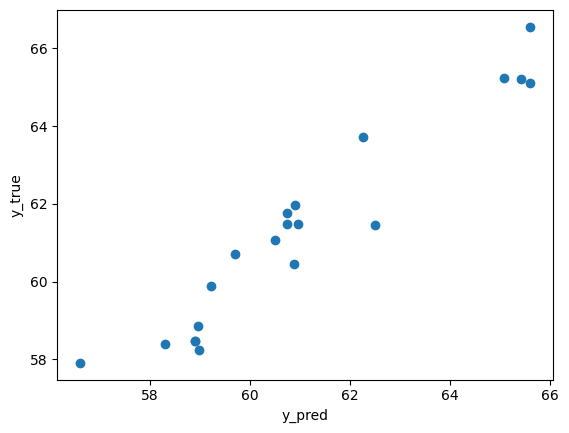

In [ ]:
#Ploteando los Resultados
import matplotlib.pyplot as plt
y_pred=model.predict(x_eval)
plt.scatter(y_pred,y_eval)
plt.xlabel('y_pred')
plt.ylabel('y_true')

In [ ]:
rmse(y_pred-y)

In [ ]:
#Tarea
#Predecirx_val y mostrar su mejor plot de y_pred vs y_eval. obtener rmse<5
#hint
#x3 está fuera de rango, hay alguna forma de normalizarlo?
#la función de activación, variará el resultado?
#Aumentar capas mejora el resultado?

